# <u>Homework 7</u>

<br>Semih KARACAOĞLU</br>
<br>17050111008</br>
<br>2021-2022 Fall</br>
<br>CENG463</br>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import scipy.stats as st
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.svm import SVC
import sklearn
import time

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>

## <u>Section 0 : Data Preparation</u>

#### <u>Preliminary Information on Data</u>

<b>Objective</b>

We want to guess what kind of music genre the music analyzed with the features mentioned in the <i>"Content"</i> section below belongs to.


<b>Content:</b>

<u>Training dataset:</u> 17,996 rows with 17 columns

<u>Column details:</u> artist name, track name, popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness liveness valence tempo, duration in milliseconds and time_signature.

<u>Target Variable:</u> 'Class’ such as Rock, Indie, Alt, Pop, Metal, Hip Hop, Alt Music, Blues, Acoustic/Folk, Instrumental, Country, Bollywood


<u>Data Source:</u>
<br>https://www.kaggle.com/purumalgi/music-genre-classification</br>

The best accuracy result found on Kaggle is 0,51.



In [2]:
df = pd.read_csv("train.csv")

In [3]:
list(df.keys())

['Artist Name',
 'Track Name',
 'Popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_in min/ms',
 'time_signature',
 'Class']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [5]:
df.shape

(17996, 17)

In [6]:
df.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0               NaN    0.0849   0.8990  134.071            234596.0   
1          0.004010    0.1010   0.5690  116.454            251733.0   
2          0.000196    0.3940   0.7870  147.681            109667.0   
3               NaN    0.1220   0.5690  107.033            173968.0   
4          0.016100    0.1720   0.0918  199.060            229960.0   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

In [7]:
# arr = df['Artist Name'].unique()
# df['Artist Name'] = df['Artist Name'].apply(lambda x: np.where(arr == x))

In [8]:
# Typecasting
df["Artist Name"] = df["Artist Name"].astype(str)

# Initializing Encoder
number = preprocessing.LabelEncoder()

# Encoding
df["Artist Name"] = number.fit_transform(df["Artist Name"])

In [9]:
#Checking if there are NaN values in the dataset.

df.isnull().values.any()

True

In [10]:
#Replacing all the NaN values with 0's.

df = df.fillna(0)

In [11]:
#Now we make sure if there are NaN values.

df.isnull().values.any()

False

<b>Exploratory Data Analysis(EDA)</b> helps us visualise the data and infer some conclusions initially just by looking at the data and not performing any algorithms. With below code block we can easily analyse the dataset if there are some <b>correlation</b> between features.

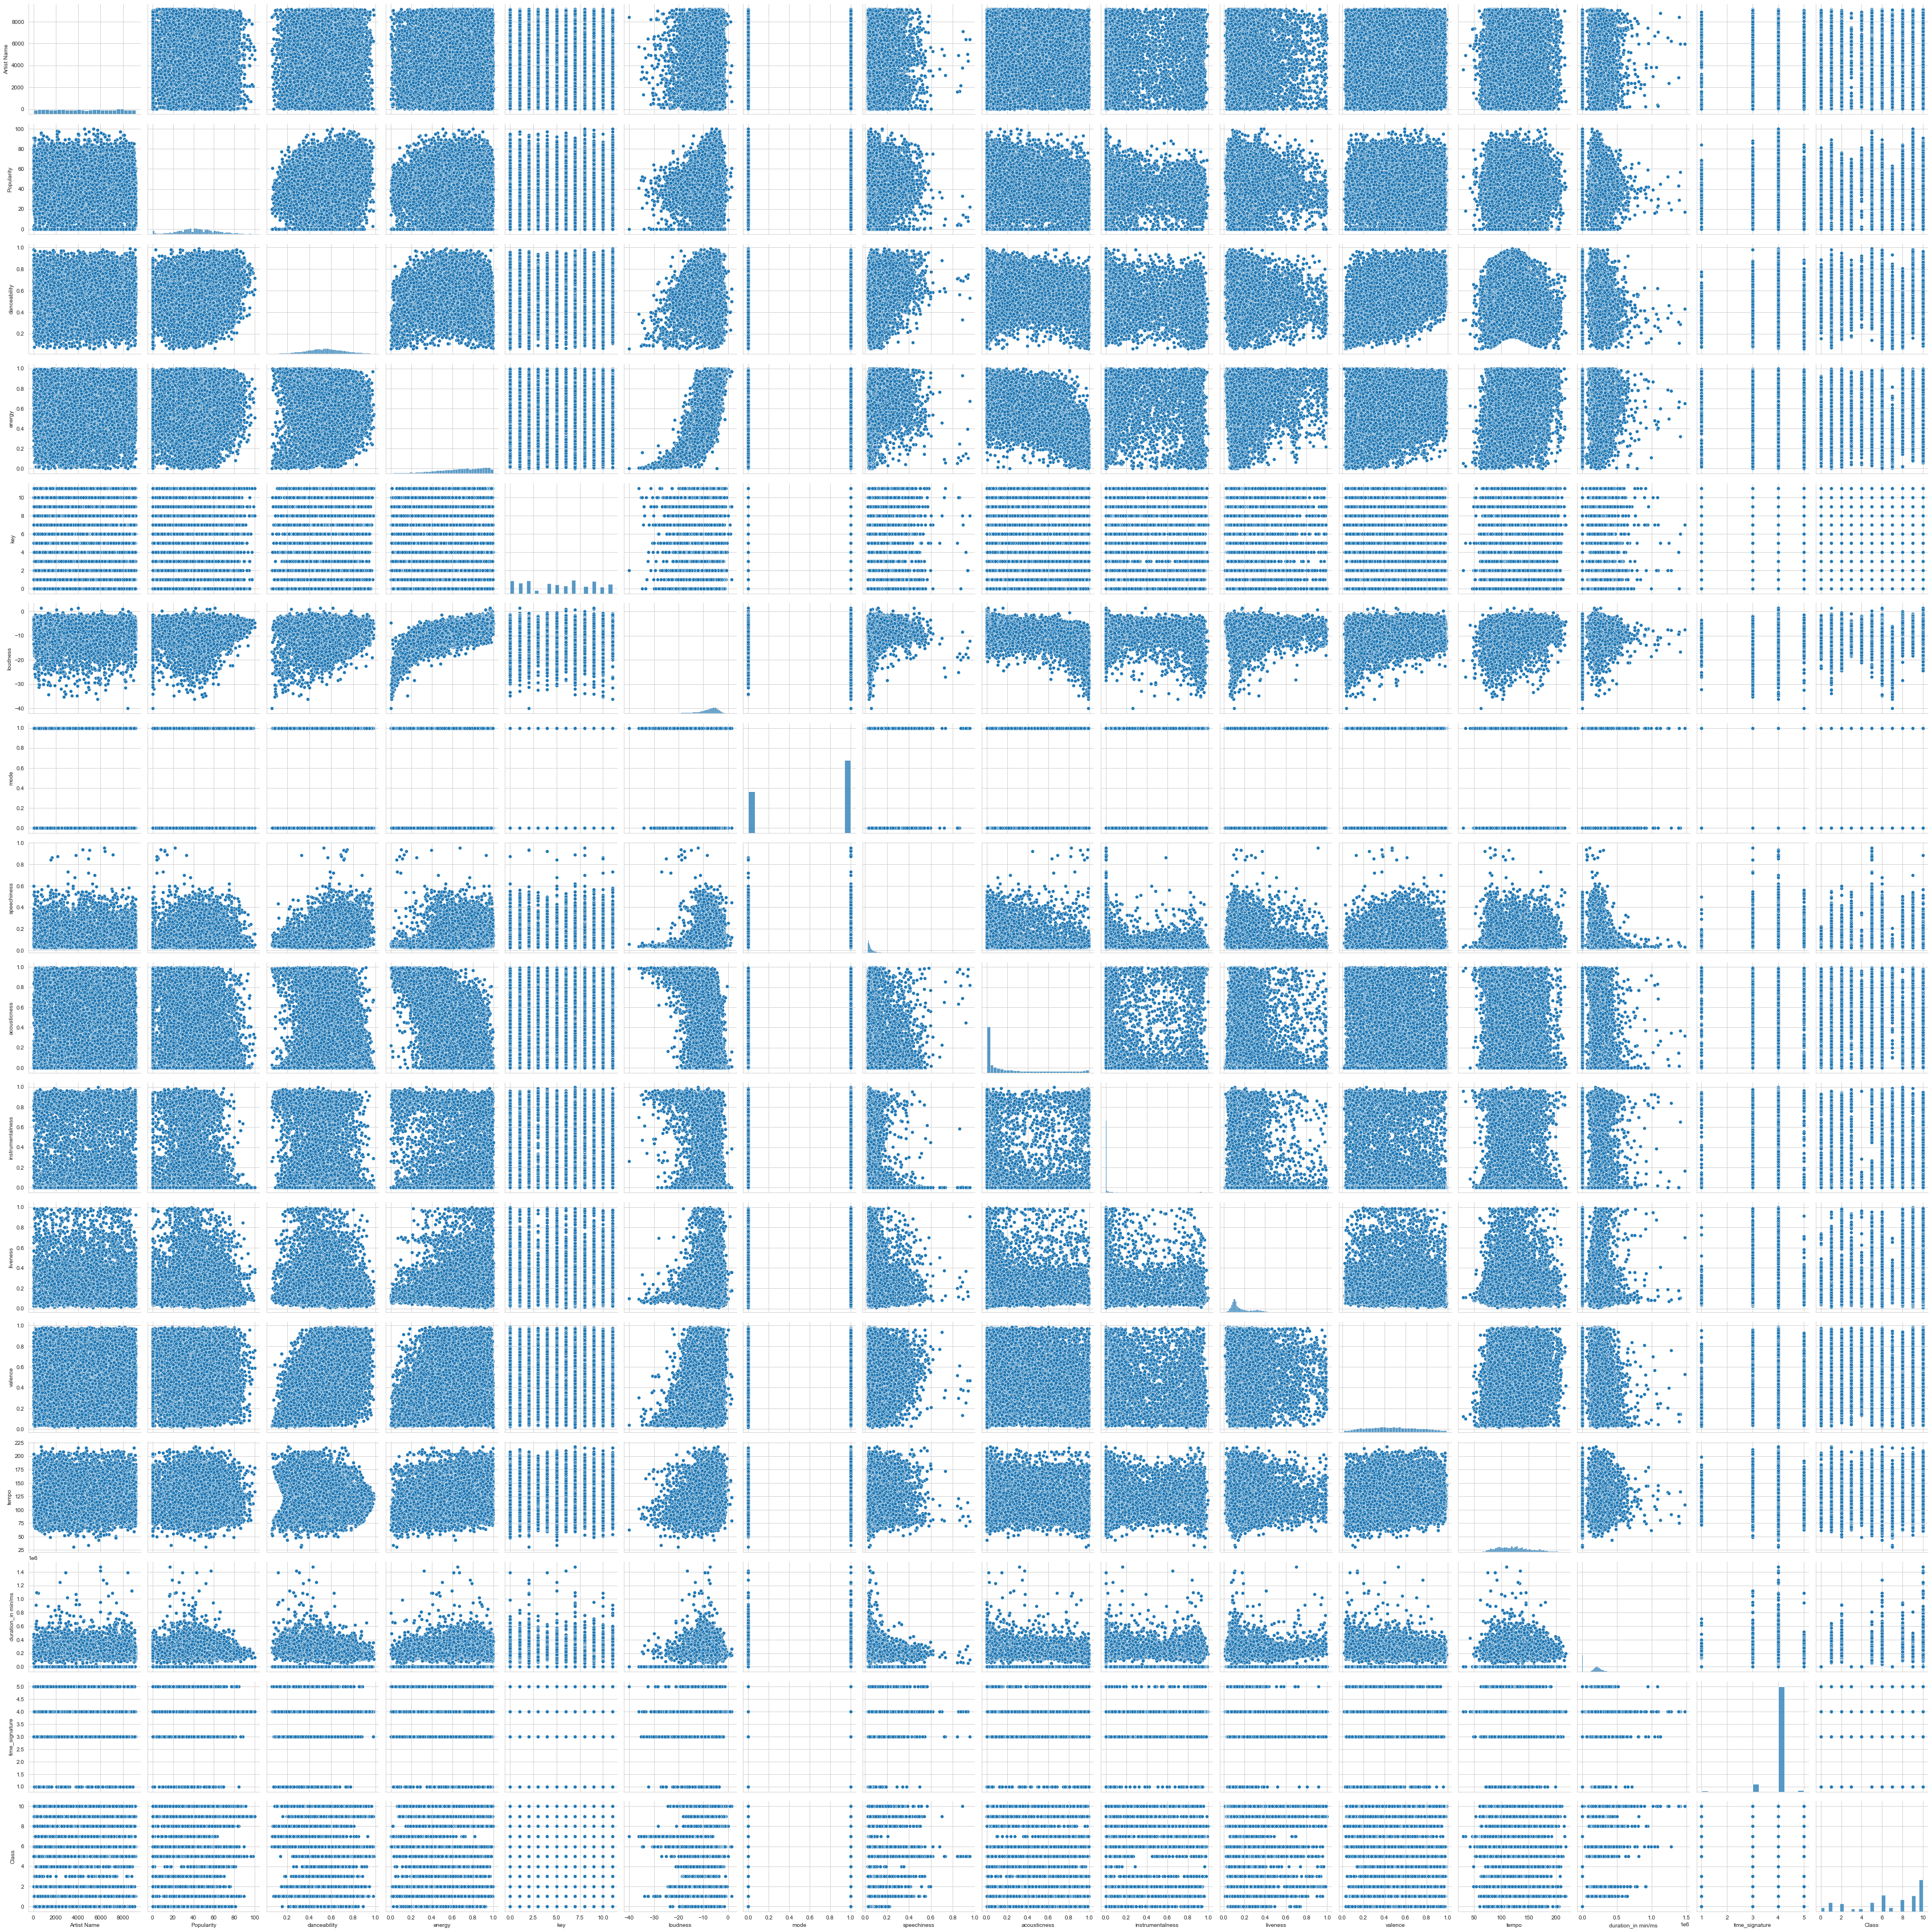

In [12]:
#Exploratory Data Analysis(EDA)

plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, height=3);
plt.show()

As we can see there is not much correlation between features. Although there is a bit correlation between <b>loudness</b> and <b>energy</b> feature, it will not affect so much the classification result.  

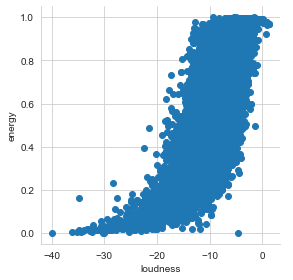

In [13]:
sns.set_style("whitegrid");
sns.FacetGrid(df, height=4) \
.map(plt.scatter, "loudness", "energy") \
.add_legend();
plt.show()

In [14]:
del df["Track Name"]
x_data = df.drop(["Class"], axis=1)
y_data = df["Class"]
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['Artist Name','Popularity', 'danceability', 'energy', 'key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_in min/ms','time_signature'])
df.head()

Artist Name  Popularity  danceability  energy   key  loudness  mode  \
0         1182        60.0         0.854   0.564   1.0    -4.964     1   
1         1092        54.0         0.382   0.814   3.0    -7.230     1   
2         7899        35.0         0.434   0.614   6.0    -8.334     1   
3         1987        66.0         0.853   0.597  10.0    -6.528     0   
4         6283        53.0         0.167   0.975   2.0    -4.279     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0485      0.017100          0.000000    0.0849   0.8990  134.071   
1       0.0406      0.001100          0.004010    0.1010   0.5690  116.454   
2       0.0525      0.486000          0.000196    0.3940   0.7870  147.681   
3       0.0555      0.021200          0.000000    0.1220   0.5690  107.033   
4       0.2160      0.000169          0.016100    0.1720   0.0918  199.060   

   duration_in min/ms  time_signature  Class  
0            234596.0               4      5  
1            251733.0               4     10  
2            109667.0               4      6  
3            173968.0               4      5  
4            229960.0               4     10

In [15]:
df.drop(["Class"],inplace=True ,axis=1)

We will apply <b>scaling</b> because, it is basically bringing all the values of different features on a same scale. As different features has different scale, normalising helps us and the model to optimise it’s parameters more efficiently.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [17]:
data

Artist Name  Popularity  danceability    energy       key  loudness  \
0         0.129209        0.60      0.854745  0.563991  0.090909  0.847024   
1         0.119370        0.54      0.346890  0.813996  0.272727  0.792166   
2         0.863467        0.35      0.402841  0.613992  0.545455  0.765439   
3         0.217206        0.66      0.853669  0.596992  0.909091  0.809161   
4         0.686817        0.53      0.115558  0.974999  0.181818  0.863607   
...            ...         ...           ...       ...       ...       ...   
17991     0.332532        0.35      0.114482  0.108982  0.636364  0.553223   
17992     0.559904        0.27      0.622337  0.222984  1.000000  0.720895   
17993     0.768693        0.34      0.536260  0.981000  0.363636  0.853826   
17994     0.087123        0.29      0.167205  0.804996  0.545455  0.658363   
17995     0.863358        0.43      0.366258  0.852997  0.363636  0.838405   

       mode  speechiness  acousticness  instrumentalness  liveness   valence  \
0       1.0     0.027882      0.017169          0.000000  0.073879  0.910096   
1       1.0     0.019410      0.001104          0.004026  0.090173  0.569081   
2       1.0     0.032172      0.487952          0.000197  0.386702  0.794358   
3       0.0     0.035389      0.021285          0.000000  0.111426  0.569081   
4       1.0     0.207507      0.000170          0.016165  0.162028  0.075953   
...     ...          ...           ...               ...       ...       ...   
17991   0.0     0.020161      0.996988          0.827309  0.087542  0.163997   
17992   0.0     0.011153      0.861446          0.000016  0.059306  0.327271   
17993   0.0     0.052225      0.000030          0.000137  0.661978  0.251834   
17994   0.0     0.119571      0.001295          0.919679  0.247040  0.347938   
17995   0.0     0.039249      0.006064          0.212851  0.325979  0.370673   

          tempo  duration_in min/ms  time_signature  
0      0.553969            0.158812            0.75  
1      0.459689            0.170413            0.75  
2      0.626804            0.074240            0.75  
3      0.409271            0.117769            0.75  
4      0.901766            0.155674            0.75  
...         ...                 ...             ...  
17991  0.754740            0.130958            0.50  
17992  0.227225            0.174024            0.75  
17993  0.398391            0.146374            0.75  
17994  0.539476            0.148724            0.75  
17995  0.575541            0.123361            0.75  

[17996 rows x 15 columns]

### As we can see our dataset is ready to process.

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>

## <u>Section 1 : KNN</u>

<b>1.1) Applying KNN With Finding Best K</b>

In [18]:
start_time_knn_1_1 = time.time()

Average accuracy in  10 - fold cross-validation for KNN with K= 1  is  0.32084769316286826
Average accuracy in  10 - fold cross-validation for KNN with K= 3  is  0.32457176826632084
Average accuracy in  10 - fold cross-validation for KNN with K= 5  is  0.37586084861960345
Average accuracy in  10 - fold cross-validation for KNN with K= 7  is  0.3948090605892162
Average accuracy in  10 - fold cross-validation for KNN with K= 9  is  0.4090352973874375
Average accuracy in  10 - fold cross-validation for KNN with K= 11  is  0.41920421839293437
Average accuracy in  10 - fold cross-validation for KNN with K= 13  is  0.4219263170897412
Average accuracy in  10 - fold cross-validation for KNN with K= 15  is  0.4255941263664999
Average accuracy in  10 - fold cross-validation for KNN with K= 17  is  0.42920542276573403
Average accuracy in  10 - fold cross-validation for KNN with K= 19  is  0.43126252238898155
Average accuracy in  10 - fold cross-validation for KNN with K= 21  is  0.434151102464332

Text(0.5, 1.0, 'K-fold Cross Validation, Test Accuracies with respect to K (for KNN)')

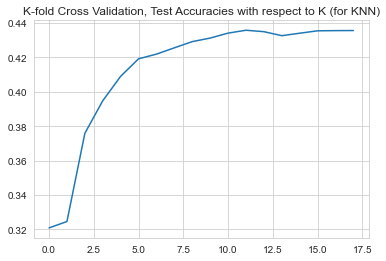

In [19]:
scores = [];

kfold = 10
bestScore = 0;
bestK = 0;
for k in range(1, 37, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knnScores = cross_val_score(knn, data, y_data, cv=kfold, scoring="accuracy")
    knnScore = statistics.mean(knnScores);
    scores.append(knnScore);
    
    print('Average accuracy in ', kfold, '- fold cross-validation for KNN with K=', k, ' is ', knnScore)
    if (knnScore > bestScore):
        bestScore = knnScore;
        bestK = k

print('')
print('Best K is ', bestK, ' with best score as ', bestScore)

plt.plot(scores)
plt.title('K-fold Cross Validation, Test Accuracies with respect to K (for KNN)')

In [20]:
# performance for best K
knn = KNeighborsClassifier(n_neighbors=bestK)

X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.20, random_state=123)

knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
print("Training accuracy = ", sum(y_train_pred == y_train) / len(y_train_pred))

y_test_pred = knn.predict(X_test)
print("Test accuracy = ", sum(y_test_pred == y_test) / len(y_test_pred))

# confusion_matrix(y_test, y_test_pred)

Training accuracy =  0.48971936649069187
Test accuracy =  0.43777777777777777


In [21]:
elapsed_time_knn_1_1 = time.time() - start_time_knn_1_1
print(elapsed_time_knn_1_1)

84.30815887451172


<b>1.2) Applying KNN After LASSO, With Finding Best K</b>

In [22]:
start_time_knn_1_2 = time.time()

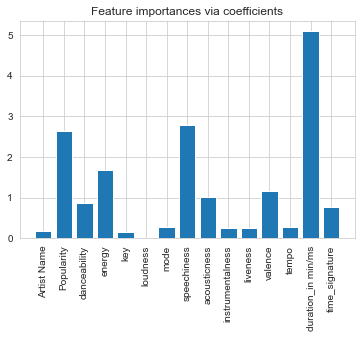

In [23]:
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(data, y_data)
importance = np.abs(lasso.coef_)
feature_names = np.array(df.columns)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation='vertical')
plt.show()

As we can see ["Artist Name","key","loudness","mode","instrumentalness","liveness","tempo"] features are don't have much impact on result. So, we remove them to improve compilation efficiency.

In [24]:
x_data1 = df.drop(['Artist Name','key','loudness','mode','instrumentalness','liveness','tempo'],axis=1)
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data1)
data1 = pd.DataFrame(X_data_minmax,columns=['Popularity','danceability','energy','speechiness','acousticness','valence','duration_in min/ms','time_signature'])

Average accuracy in  10 - fold cross-validation for KNN with K= 1  is  0.33601886850719537
Average accuracy in  10 - fold cross-validation for KNN with K= 3  is  0.35013140016058303
Average accuracy in  10 - fold cross-validation for KNN with K= 5  is  0.3996413130751652
Average accuracy in  10 - fold cross-validation for KNN with K= 7  is  0.4204247112593416
Average accuracy in  10 - fold cross-validation for KNN with K= 9  is  0.43448431227225004
Average accuracy in  10 - fold cross-validation for KNN with K= 11  is  0.4377619974059663
Average accuracy in  10 - fold cross-validation for KNN with K= 13  is  0.4449860107467111
Average accuracy in  10 - fold cross-validation for KNN with K= 15  is  0.4482094373417331
Average accuracy in  10 - fold cross-validation for KNN with K= 17  is  0.45265412883700823
Average accuracy in  10 - fold cross-validation for KNN with K= 19  is  0.4542101167315175
Average accuracy in  10 - fold cross-validation for KNN with K= 21  is  0.4536545920573158


Text(0.5, 1.0, 'K-fold Cross Validation, Test Accuracies with respect to K (for KNN)')

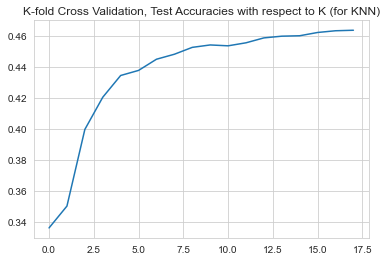

In [25]:
scores = [];

kfold = 10
bestScore = 0;
bestK = 0;
for k in range(1, 37, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knnScores = cross_val_score(knn, data1, y_data, cv=kfold, scoring="accuracy")
    knnScore = statistics.mean(knnScores);
    scores.append(knnScore);
    
    print('Average accuracy in ', kfold, '- fold cross-validation for KNN with K=', k, ' is ', knnScore)
    if (knnScore > bestScore):
        bestScore = knnScore;
        bestK = k

print('')
print('Best K is ', bestK, ' with best score as ', bestScore)

plt.plot(scores)
plt.title('K-fold Cross Validation, Test Accuracies with respect to K (for KNN)')

In [26]:
# performance for best K
knn = KNeighborsClassifier(n_neighbors=bestK)

X_train, X_test, y_train, y_test = train_test_split(data1, y_data, test_size=0.20, random_state=123)

knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
print("Training accuracy = ", sum(y_train_pred == y_train) / len(y_train_pred))

y_test_pred = knn.predict(X_test)
print("Test accuracy = ", sum(y_test_pred == y_test) / len(y_test_pred))

Training accuracy =  0.4940955821061406
Test accuracy =  0.46805555555555556


In [27]:
elapsed_time_knn_1_2 = time.time() - start_time_knn_1_2
print(elapsed_time_knn_1_2)

51.91807842254639


<b>1.3) Built-in KNN</b>

We will use the built-in KNN algorithm from sci-kit learn. We split the our input and output data into training and testing data, as to train the model on training data and testing model’s accuracy on the testing model. We choose a 80%–20% split for our training and testing data.

In [28]:
start_time_knn_1_3 = time.time()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_train_pred = knn_clf.predict(X_train) #These are the predicted output values
y_test_pred = knn_clf.predict(X_test) #These are the predicted output values

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, y_test_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 57   9   6   2   5   1  13   1   1  28  13]
 [  8  21  14   0   0   8  59   4  21  34  85]
 [ 10  22  84   5   3   2  37   3   6  40  65]
 [  8   5  10  39   2   1   4   4   0   4   5]
 [ 14   3   6   4  18   1   3   0   0  12  20]
 [  3   9  14   0   1 153  31   0   4  56  26]
 [  8  76  25   2   1  18 115  14  29  57 128]
 [ 10   2   2   0   0   0   7  99   0   1   1]
 [  3  18   2   0   0   0  42   1 178   4 131]
 [ 20  42  27   3   4  41  53   0   7 199 110]
 [ 16  88  41   3   4  11 154   2 146 103 425]]
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.42      0.39       136
           1       0.07      0.08      0.08       254
           2       0.36      0.30      0.33       277
           3       0.67      0.48      0.56        82
           4       0.47      0.22      0.30        81
           5       0.65      0.52      0.57       297
           6       0.22      0.24      0.23       473
        

In [31]:
print("Training accuracy = ", sum(y_train_pred == y_train) / len(y_train_pred))

print("Test accuracy = ", sum(y_test_pred == y_test) / len(y_test_pred))

Training accuracy =  0.5814809669352597
Test accuracy =  0.38555555555555554


In [32]:
elapsed_time_knn_1_3 = time.time() - start_time_knn_1_3
print(elapsed_time_knn_1_3)

2.7339322566986084


<b>1.4) Applying Built-in KNN After Feature Selection (LASSO) Process</b>

We have already applied LASSO. So, we know which features we will remove. We know ["Artist Name","key","loudness","mode","instrumentalness","liveness","tempo"] features are don't have much impact on result.

In [33]:
start_time_knn_1_4 = time.time()

In [34]:
x_data2 = df.drop(['Artist Name',"key","loudness","mode","instrumentalness","liveness","tempo"],axis=1)
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data2)
data2 = pd.DataFrame(X_data_minmax,columns=['Popularity','danceability','energy','speechiness','acousticness','valence','duration_in min/ms','time_signature'])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data2, y_data,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_train_pred = knn_clf.predict(X_train) #These are the predicted output values
y_test_pred = knn_clf.predict(X_test) #These are the predicted output values

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 76   1   3  12   8   2   1  11   1  18   3]
 [  0  24  18   0   0  18  64   1  18  34  77]
 [  3  21  94   3   0   4  40   1   5  35  71]
 [  9   0   7  47   2   1   1   4   0   6   5]
 [ 17   3   0   7  38   2   0   0   0   4  10]
 [  2  12  14   0   0 187  20   0   4  43  15]
 [  3  69  30   2   0  36 108   5  19  61 140]
 [ 13   1   1   3   4   0   1  97   0   0   2]
 [  0  16   4   0   0   0  33   0 196   6 124]
 [ 11  44  38   3   8  41  69   4   5 171 112]
 [  5  99  48   0  14  19 160   0 136 105 407]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       136
           1       0.08      0.09      0.09       254
           2       0.37      0.34      0.35       277
           3       0.61      0.57      0.59        82
           4       0.51      0.47      0.49        81
           5       0.60      0.63      0.62       297
           6       0.22      0.23      0.22       473
        

In [37]:
print("Training accuracy = ", sum(y_train_pred == y_train) / len(y_train_pred))


print("Test accuracy = ", sum(y_test_pred == y_test) / len(y_test_pred))

Training accuracy =  0.5888441233676021
Test accuracy =  0.4013888888888889


In [38]:
elapsed_time_knn_1_4 = time.time() - start_time_knn_1_4
print(elapsed_time_knn_1_4)

1.4246506690979004


# <u>KNN RESULTS</u>

<u><b>Training Accuracy</b> Results For All KNN Approaches</u>
    
    1.1) Applying KNN With Finding Best K = 0.48971936649069187
    1.2) Applying KNN After LASSO, With Finding Best K = 0.4940955821061406
    1.3) Built-in KNN = 0.5814809669352597
    1.4) Applying Built-in KNN After Feature Selection (LASSO) Process = 0.5888441233676021

<u><b>Test Accuracy</b> Results For All KNN Approaches</u>
    
    1.1) Applying KNN With Finding Best K = 0.43777777777777777
    1.2) Applying KNN After LASSO, With Finding Best K = 0.46805555555555556
    1.3) Built-in KNN = 0.38555555555555554
    1.4) Applying Built-in KNN After Feature Selection (LASSO) Process = 0.4013888888888889

<u><b>Duration</b></u>
    
    1.1) 84.30815887451172
    1.2) 51.91807842254639
    1.3) 2.7339322566986084
    1.4) 1.4246506690979004

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>

## <u>Section 2 : Logistic Regression</u>

Logistic regression is a sort of statistical regression analysis that uses a set of predictor or independent variables to predict the result of a categorical dependent variable. The dependant variable in logistic regression is always binary. The major applications of logistic regression are prediction and assessing the likelihood of success.

Train a Logistic Regression model

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.30, random_state=123)

In [40]:
start_time_logistic_regression = time.time()

In [41]:
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

In [42]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, max_iter=700)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=700, multi_class='multinomial')

In [43]:
print('Overall accuracy (trained all data): ', softmax_reg.score(X_train, y_train))

Overall accuracy (trained all data):  0.4982138604429626


In [44]:
elapsed_time_logistic_regression = time.time() - start_time_logistic_regression
print(elapsed_time_logistic_regression)

4.517354726791382


In [45]:
y_test_pred=softmax_reg.predict(X_test)
y_train_pred=softmax_reg.predict(X_train)

<AxesSubplot:>

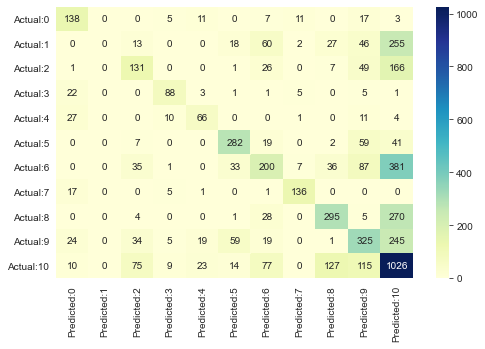

In [46]:
cm=confusion_matrix(y_test,y_test_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3','Predicted:4','Predicted:5','Predicted:6','Predicted:7','Predicted:8','Predicted:9','Predicted:10'],index=['Actual:0','Actual:1','Actual:2','Actual:3','Actual:4','Actual:5','Actual:6','Actual:7','Actual:8','Actual:9','Actual:10'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [47]:
print("Training accuracy = ", sum(y_train_pred == y_train) / len(y_train_pred))


print("Test accuracy = ", sum(y_test_pred == y_test) / len(y_test_pred))

Training accuracy =  0.4982138604429626
Test accuracy =  0.4976847564363771


# <u>Logistic Regression Results</u>

<b>Training accuracy =</b>  0.4982138604429626
<b><br>Test accuracy =</br></b>  0.4976847564363771

<b>Duration = </b> 4.517354726791382
   

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>

## <u>Section 3 : Decision Tree</u>

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.30, random_state=123)

In [49]:
start_time_desicion_tree = time.time()

In [50]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_test = tree_clf.predict(X_test)
y_pred_train = tree_clf.predict(X_train)

print("\nConfusion Matrix is,\n",confusion_matrix(y_test,y_pred_test))
print("\nClassification report:\n", classification_report(y_test,y_pred_test,target_names=["0","1","2","3","4","5","6","7","8","9","10"]))
print("Accuracy on test set with tree: {:.2f}".format(accuracy_score(y_test, y_pred_test)))


Confusion Matrix is,
 [[114   0   0  24  21   0   0   9   0  13  11]
 [  0  44  22   0   0   9 195   0  13  28 110]
 [  0  27 112   0   0  14  62   0  11  39 116]
 [ 17   0   0  83   3   0   0   9   0   6   8]
 [ 16   0   0   5  73   0   0   6   0  11   8]
 [  0  15  16   0   0 240  35   0   7  71  26]
 [  0 204  56   0   0  25 198   0  42  68 187]
 [ 12   0   0   4   2   0   0 142   0   0   0]
 [  0  46  14   0   0   5  50   0 275  10 203]
 [ 16  61  32   2  14  70  81   1   6 318 130]
 [ 12 214 113   2  12  38 211   3 192 151 528]]

Classification report:
               precision    recall  f1-score   support

           0       0.61      0.59      0.60       192
           1       0.07      0.10      0.09       421
           2       0.31      0.29      0.30       381
           3       0.69      0.66      0.67       126
           4       0.58      0.61      0.60       119
           5       0.60      0.59      0.59       410
           6       0.24      0.25      0.25       780
 

In [51]:
from sklearn.model_selection import GridSearchCV

params_dt = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

tree_clf= DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params_dt, scoring="accuracy",n_jobs=-1, cv=5)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
best_score=tree_cv.best_score_

print(f"Best score: {best_score}")
print(f"Best paramters: {best_params}")

Best score: 0.47884613445748814
Best paramters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 9, 'min_samples_split': 2, 'splitter': 'best'}


In [52]:
tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
y_pred_train = tree_clf.predict(X_train)
y_pred_test = tree_clf.predict(X_test)

print("\nConfusion Matrix is,\n",confusion_matrix(y_test,y_pred_test))
print("\nClassification report:\n", classification_report(y_test,y_pred_test,target_names=["0","1","2","3","4","5","6","7","8","9","10"]))
print("Accuracy on train set with tree: {:.2f}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy on test set with tree: {:.2f}".format(accuracy_score(y_test, y_pred_test)))


Confusion Matrix is,
 [[142   0   0  21  17   0   0   7   0   3   2]
 [  0  12  50   0   0  20  69   0  25  31 214]
 [  0   1 146   0   0  13  41   0   9  39 132]
 [ 26   0   0  82   3   0   0   7   0   5   3]
 [ 32   0   0   6  68   0   0   1   0   9   3]
 [  0   0  10   0   0 296  21   0   0  52  31]
 [  0  16  87   0   0  33 225   0  38  43 338]
 [ 10   0   0   9   0   0   0 140   0   0   1]
 [  0   2  15   0   0   4  27   0 313   4 238]
 [ 14   2  27   8  13  91  45   0   4 315 212]
 [ 18   7 133   1  18  28 100   1 147 140 883]]

Classification report:
               precision    recall  f1-score   support

           0       0.59      0.74      0.65       192
           1       0.30      0.03      0.05       421
           2       0.31      0.38      0.34       381
           3       0.65      0.65      0.65       126
           4       0.57      0.57      0.57       119
           5       0.61      0.72      0.66       410
           6       0.43      0.29      0.34       780
 

In [53]:
elapsed_time_desicion_tree = time.time() - start_time_desicion_tree
print(elapsed_time_desicion_tree)

484.78089451789856


<AxesSubplot:>

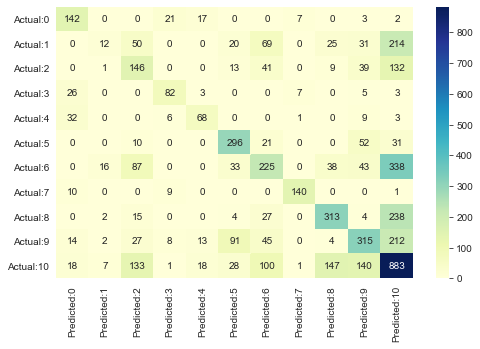

In [54]:
cm=confusion_matrix(y_test,y_pred_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3','Predicted:4','Predicted:5','Predicted:6','Predicted:7','Predicted:8','Predicted:9','Predicted:10'],index=['Actual:0','Actual:1','Actual:2','Actual:3','Actual:4','Actual:5','Actual:6','Actual:7','Actual:8','Actual:9','Actual:10'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# <u>Desicion Tree Results</u>

<b>Training accuracy =</b>  0.52
<b><br>Test accuracy =</br></b>  0.49

<b>Duration = </b> 484.78089451789856
   

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>

## <u>Section 4 : OVA with SVM </u>

In [113]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.30, random_state=123)

In [114]:
start_time_svm_ova = time.time()

In [115]:
# SVM for multi-class classification using built-in one-vs-rest (all)
from sklearn.datasets import make_classification

# define model
model = SVC(decision_function_shape='ovr')
# fit model
model.fit(X_train, y_train)
# make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [116]:
elapsed_time_svm_ova = time.time() - start_time_svm_ova
print(elapsed_time_svm_ova)

32.97613477706909


In [117]:
print("Accuracy on train set with tree: {:.2f}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy on test set with tree: {:.2f}".format(accuracy_score(y_test, y_pred_test)))

Accuracy on train set with tree: 0.53
Accuracy on test set with tree: 0.50


<AxesSubplot:>

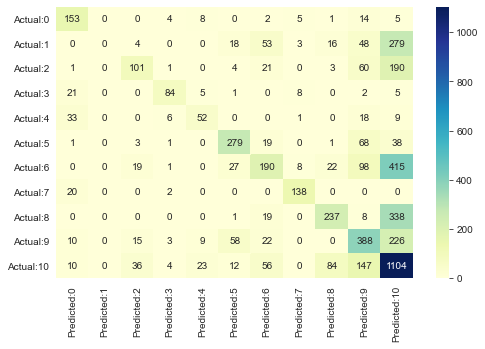

In [118]:
cm=confusion_matrix(y_test,y_pred_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3','Predicted:4','Predicted:5','Predicted:6','Predicted:7','Predicted:8','Predicted:9','Predicted:10'],index=['Actual:0','Actual:1','Actual:2','Actual:3','Actual:4','Actual:5','Actual:6','Actual:7','Actual:8','Actual:9','Actual:10'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# <u>OVA With SVM Results</u>

<b>Training accuracy =</b>  0.53
<b><br>Test accuracy =</b>  0.50
<b><br>Duration = </b> 33.67536115646362

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>

## <u>Section 5 : OVO with SVM </u>

In [107]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.30, random_state=123)

In [108]:
start_time_svm_ovo = time.time()

In [109]:
# SVM for multi-class classification using built-in one-vs-one

# define model
model = SVC(decision_function_shape='ovo')
# fit model
model.fit(X_train, y_train)
# make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [110]:
elapsed_time_svm_ovo = time.time() - start_time_svm_ovo
print(elapsed_time_svm_ovo)

33.19645285606384


In [111]:
print("Accuracy on train set with tree: {:.2f}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy on test set with tree: {:.2f}".format(accuracy_score(y_test, y_pred_test)))

Accuracy on train set with tree: 0.53
Accuracy on test set with tree: 0.50


<AxesSubplot:>

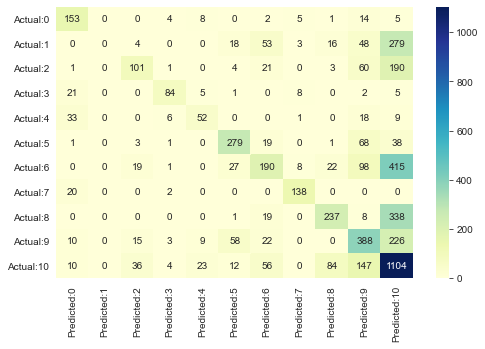

In [112]:
cm=confusion_matrix(y_test,y_pred_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3','Predicted:4','Predicted:5','Predicted:6','Predicted:7','Predicted:8','Predicted:9','Predicted:10'],index=['Actual:0','Actual:1','Actual:2','Actual:3','Actual:4','Actual:5','Actual:6','Actual:7','Actual:8','Actual:9','Actual:10'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# <u>OVO With SVM Results</u>

<b>Training accuracy =</b>  0.53
<b><br>Test accuracy =</b>  0.50
<b><br>Duration = </b> 33.66477060317993

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>

## <u>Section 6 : Analyses </u>

<b>In section 1</b> with using KNN, the best test accuracy score was the highest one amoung the other KNN approaches. <b>In section 1.2</b> which have highest accuracy score, we have used LASSO for feature reduction. With appliying this, we easily see the less effective features through feature importance bar graph. So, before appliying KNN we applied LASSO and  remove these unefficient features. After that, we applied KNN to find best k with using k-fold. And, the result was higher than built-in KNN function and finding best k without feature selection. Best <b>accuracy score was 0.47</b>. But one <b>disadvantage</b> of using best k method instead of built-in KNN method the time it takes. After finding best k, appliying KNN gives better result but takes more time. The duration was <b>52 seconds</b> for feature selected, best k KNN method. But it was 84 seconds without feature selection. So, we improve compilation time efficiency and accuracy score with appliying LASSO.

<b>In section 2</b> with using Logistic Regression, <b>the accuracy score was 0.50</b> which is a good result for this dataset. Logistic Regression provided better result than KNN on this dataset. Also, the duration was <b>4.5 seconds</b> that is a very affective result.

<b>In section 3</b> with using Decision Tree, the <b>test accuracy score we find was 0.49</b>. Again this is not a bad result. But when it comes to the time it takes, we see that Decision Tree is a very inefficient classification method for this dataset. The process took <b>485 seconds</b> which is a very inefficient result comparing to other methods we used. 

<b>In section 4 & 5</b> with using SVM (OVA & OVO) <b>the test accuracy score was same which is 0.50</b>. Also, the duration was almost same which is <b>33 seconds</b>.

In [98]:
# df2 = pd.read_csv("submission.csv")

In [99]:
# list(df2.keys())

In [100]:
# df2.info()

In [101]:
# df2

In [102]:
# df2.iloc[5,:]

In [103]:
# df3 = pd.read_csv("test.csv")

In [104]:
# list(df3.keys())

In [105]:
# df3.info()

In [106]:
# df3.head()